Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Loading Dataset

In [3]:
df = pd.read_csv('CAR_PRICES.csv')

Data Pre Processing

In [4]:
df.shape

(166168, 16)

In [5]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166168 entries, 0 to 166167
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          166168 non-null  int64  
 1   make          164684 non-null  object 
 2   model         164656 non-null  object 
 3   trim          164355 non-null  object 
 4   body          161811 non-null  object 
 5   transmission  146486 non-null  object 
 6   vin           166168 non-null  object 
 7   state         166167 non-null  object 
 8   condition     154375 non-null  float64
 9   odometer      166090 non-null  float64
 10  color         165889 non-null  object 
 11  interior      165889 non-null  object 
 12  seller        166167 non-null  object 
 13  mmr           166167 non-null  float64
 14  sellingprice  166167 non-null  float64
 15  saledate      166167 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 20.3+ MB


In [7]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,166168.000000,154375.000000,166090.000000,166167.000000,166167.000000
mean,2009.541783,29.839274,72487.631928,12967.734418,12687.880494
std,4.156622,13.770831,56243.918069,9394.050746,9448.656388
min,1984.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,22.000000,28727.250000,5975.000000,5600.000000
50%,2011.000000,34.000000,57093.500000,11700.000000,11400.000000
75%,2013.000000,41.000000,106757.500000,17500.000000,17300.000000
max,2015.000000,49.000000,999999.000000,176000.000000,169500.000000


CHECKING FOR NULL VALUES

In [8]:
df.isnull().sum()

,0
year,0
make,1484
model,1512
trim,1813
body,4357
transmission,19682
vin,0
state,1
condition,11793
odometer,78


Removing Extra Spaces

In [9]:
str_cols = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

REMOVING NULL VALUES

In [10]:
numerical_cols = ['odometer', 'mmr', 'sellingprice']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
columns_to_check = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'condition', 'saledate']
df = df.dropna(subset=columns_to_check)
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


ENCODING

In [11]:
df['transmission'] = df['transmission'].replace({'autmatic': 'automatic', 'manaul': 'manual'})
df['transmission'] = df['transmission'].replace({'automatic': 1, 'manual': 0})

<ipython-input-11-0253761ecb8c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission'] = df['transmission'].replace({'automatic': 1, 'manual': 0})


RENAMING COLUMNS

In [12]:
df.rename(columns={'mmr': 'market_reference_price'}, inplace=True)
df.rename(columns = {'vin': 'vehicle identification number'},inplace=True)

Standardize, Normalize & Round 'condition' Column



In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df['condition'] = StandardScaler().fit_transform(df[['condition']])
df['condition'] = (df['condition'] - df['condition'].mean()) / df['condition'].std()

scaler = MinMaxScaler()
df['condition'] = scaler.fit_transform(df[['condition']])

def round_column_values(value):
    return round(value, 2)  # Round to 2 decimal places, change as needed

df['condition'] = df['condition'].apply(round_column_values)

<ipython-input-14-d4eceac8f138>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = StandardScaler().fit_transform(df[['condition']])
<ipython-input-14-d4eceac8f138>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = (df['condition'] - df['condition'].mean()) / df['condition'].std()
<ipython-input-14-d4eceac8f138>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

FORMATTING COLUMNS

In [13]:
df['state'] = df['state'].str.upper()
print(df['state'])

0         CA
1         CA
2         CA
3         CA
4         CA
          ..
166161    CA
166162    NC
166163    OH
166164    VA
166165    OH
Name: state, Length: 133185, dtype: object


MODIFYING DATE COLUMN

In [14]:
df['saledate'] = df['saledate'].astype(str)
df['sale_date_clean'] = df['saledate'].str.slice(start=4, stop=16)
df.drop(['saledate'], axis=1, inplace=True)

In [17]:
df.head()

,year,make,model,trim,body,transmission,vehicle identification number,state,condition,odometer,color,interior,seller,market_reference_price,sellingprice,sale_date_clean
0,2015,Kia,Sorento,LX,SUV,1,5xyktca69fg566472,CA,0.08,16639.0,white,black,kia motors america inc,20500,21500,Dec 16 2014
1,2015,Kia,Sorento,LX,SUV,1,5xyktca69fg561319,CA,0.08,9393.0,white,beige,kia motors america inc,20800,21500,Dec 16 2014
2,2014,BMW,3 Series,328i SULEV,Sedan,1,wba3c1c51ek116351,CA,0.92,1331.0,gray,black,financial services remarketing (lease),31900,30000,Jan 15 2015
3,2015,Volvo,S60,T5,Sedan,1,yv1612tb4f1310987,CA,0.83,14282.0,white,black,volvo na rep/world omni,27500,27750,Jan 29 2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,1,wba6b2c57ed129731,CA,0.88,2641.0,gray,black,financial services remarketing (lease),66000,67000,Dec 18 2014


REMOVING OUTLIERS

In [15]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['odometer'] < (Q1 - 1.5 * IQR)) | (df['odometer'] > (Q3 + 1.5 * IQR))]
df = df[~((df['odometer'] < (Q1 - 1.5 * IQR)) | (df['odometer'] > (Q3 + 1.5 * IQR)))]
df.head()

,year,make,model,trim,body,transmission,vehicle identification number,state,condition,odometer,color,interior,seller,market_reference_price,sellingprice,sale_date_clean
0,2015,Kia,Sorento,LX,SUV,1,5xyktca69fg566472,CA,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Dec 16 2014
1,2015,Kia,Sorento,LX,SUV,1,5xyktca69fg561319,CA,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Dec 16 2014
2,2014,BMW,3 Series,328i SULEV,Sedan,1,wba3c1c51ek116351,CA,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Jan 15 2015
3,2015,Volvo,S60,T5,Sedan,1,yv1612tb4f1310987,CA,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Jan 29 2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,1,wba6b2c57ed129731,CA,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Dec 18 2014


EXPLOATORY DATA ANALYSIS

 Distribution of Manufacture

<Axes: title={'center': 'Top 10 Vehicle Makes'}, xlabel='make'>

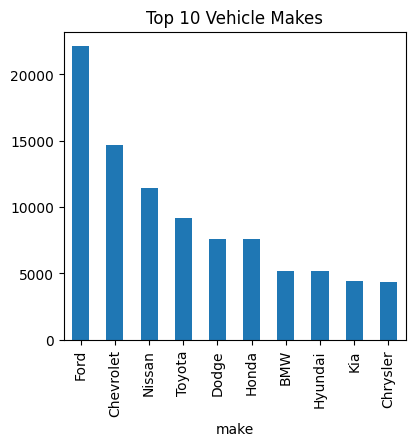

In [16]:
#1 Distribution of Manufacture
import matplotlib.pyplot as plt
manufacture_distribution = df['make'].value_counts().head(10)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
manufacture_distribution.plot(kind='bar', title='Top 10 Vehicle Makes')

Price Distribution

Text(0, 0.5, 'Frequency')

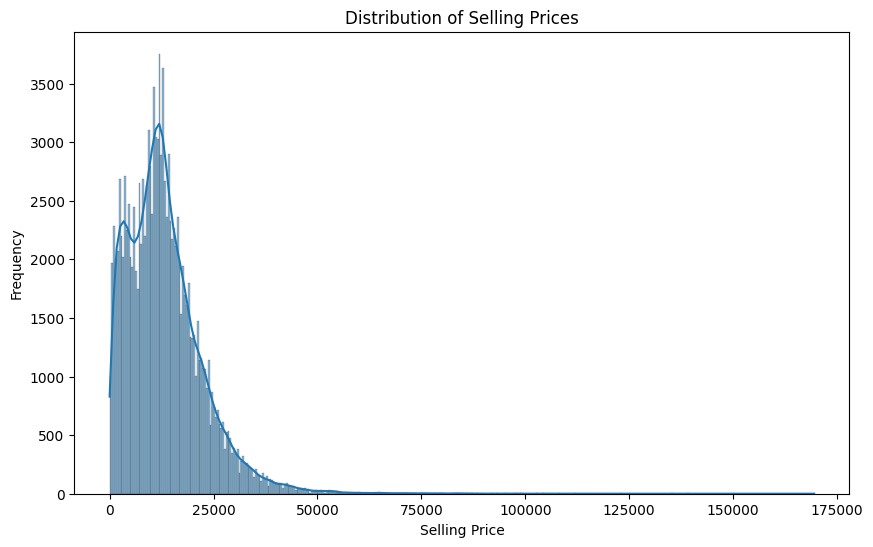

In [17]:
#2 Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

Year of Manufacture vs. Selling Price

Text(0.5, 1.0, 'Year of Manufacture vs. Selling Price')

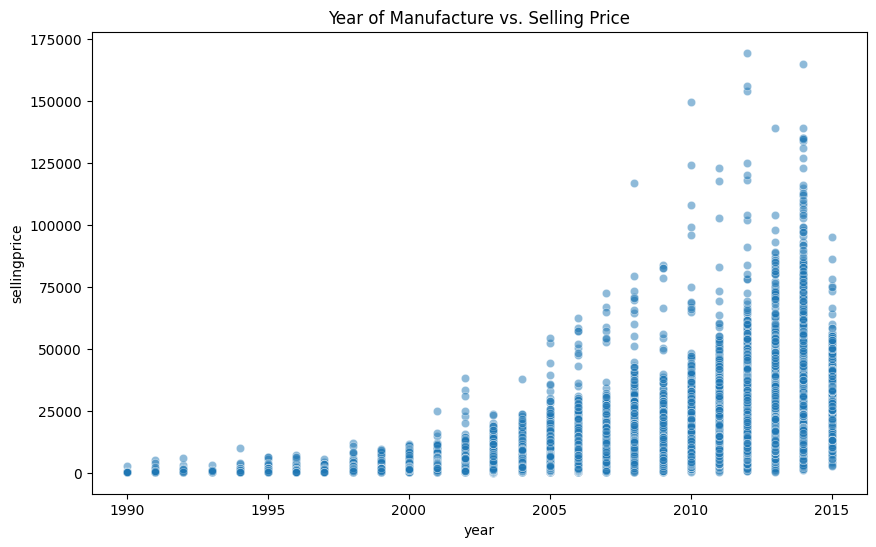

In [18]:
# 3 Year of Manufacture vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='sellingprice', data=df, alpha=0.5)
plt.title('Year of Manufacture vs. Selling Price')

Top 10 Models by Average Selling Price

Text(0.5, 0, 'Average Selling Price')

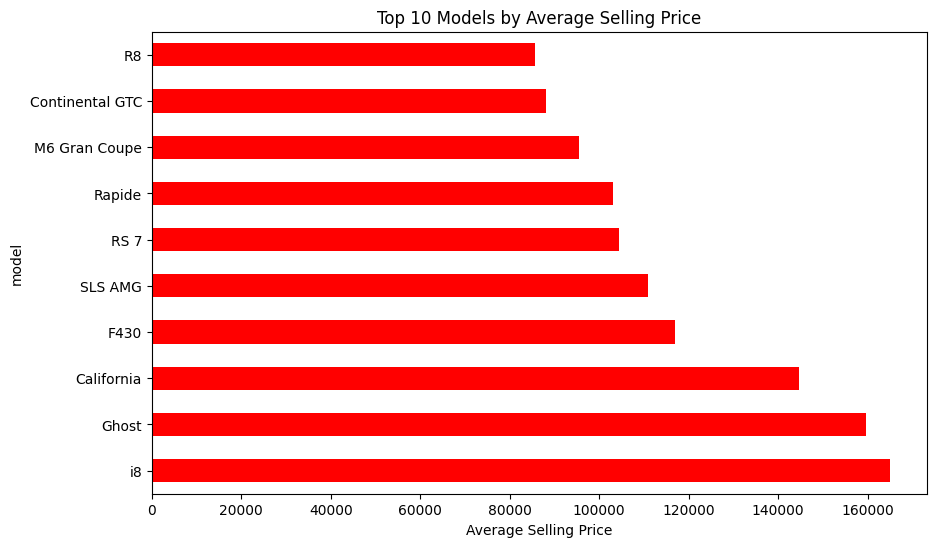

In [20]:
#4  Top 10 Models by Average Selling Price
topmodels = df.groupby('model')['sellingprice'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
topmodels.plot(kind='barh', color='red')
plt.title('Top 10 Models by Average Selling Price')
plt.xlabel('Average Selling Price')

Seller Analysis

Text(0, 0.5, 'Average Selling Price')

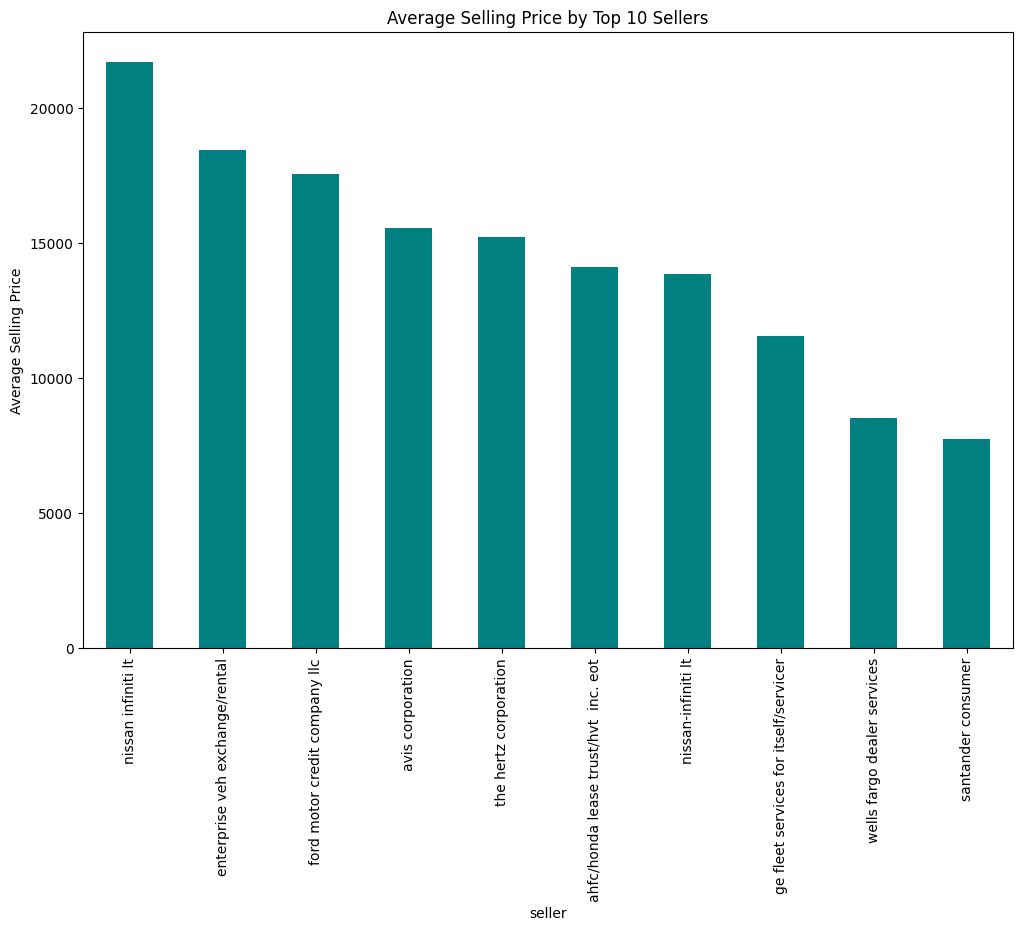

In [21]:
#5 Seller Analysis
# Limiting the analysis to the top 10 sellers by volume for clarity
sellers = df['seller'].value_counts().head(10).index
top_sellers = df[df['seller'].isin(sellers)]
avg_price = top_sellers.groupby('seller')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_price.plot(kind='bar', color='teal')
plt.title('Average Selling Price by Top 10 Sellers')
plt.ylabel('Average Selling Price')

MODEL TRAINING

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['make'] = encoder.fit_transform(df['make'])
df['model'] = encoder.fit_transform(df['model'])
df['trim'] = encoder.fit_transform(df['trim'])
df['body'] = encoder.fit_transform(df['body'])
df['vehicle identification number'] = encoder.fit_transform(df['vehicle identification number'])
df['state'] = encoder.fit_transform(df['state'])
df['color'] = encoder.fit_transform(df['color'])
df['interior'] = encoder.fit_transform(df['interior'])
df['seller'] = encoder.fit_transform(df['seller'])
df['sale_date_clean'] = encoder.fit_transform(df['sale_date_clean'])

TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split

# Separate features and target
features = df.drop("sellingprice", axis=1)
target = df["sellingprice"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)


BASELINE ALGORITMS :

1. Linear Regresssion
2. Decision Tree Regressor
3. XG BOOST

In [25]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Initialize and train the models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("-" * 20)

evaluate_model(y_test, linear_predictions, "Linear Regression")
evaluate_model(y_test, tree_predictions, "Decision Tree Regression")
evaluate_model(y_test, xgb_predictions, "XGBoost Regression")

Linear Regression Evaluation:
Mean Squared Error: 2640062.0558433314
Mean Absolute Error: 1045.6789825391363
R-squared: 0.9697942997683117
--------------------
Decision Tree Regression Evaluation:
Mean Squared Error: 4425812.9063238995
Mean Absolute Error: 1366.6211762910978
R-squared: 0.9493630168146735
--------------------
XGBoost Regression Evaluation:
Mean Squared Error: 2370479.427263162
Mean Absolute Error: 912.1276477946416
R-squared: 0.9728786712316794
--------------------


### **Analysis of Model Performance**

#### **1. Linear Regression**  

✅ **Performs well but may be underfitting complex patterns** since it assumes a linear relationship between features and target values.  

#### **2. Decision Tree Regression**  

- **Worst performer in this comparison.**  
- High **MSE & MAE** indicate it’s **overfitting** (too complex).  
- **Decision trees tend to have high variance**, meaning they don’t generalize well.  

#### **3. XGBoost Regression (Best Model)**  

- **Best performing model** with the lowest error and highest R².  
- Captures non-linearity well, reducing prediction errors compared to Linear Regression.  
- **Better generalization than Decision Trees** due to boosting.  

---

### **Key Takeaways**
1. **XGBoost is the best model** based on R² (0.9729), lowest **MSE**, and **MAE**.  
2. **Linear Regression performs reasonably well**, meaning the dataset might not have too many non-linear relationships.  
3. **Decision Tree is overfitting**, making it less reliable.  



                    **Modified Approaches:**

**Linear Regression Models**

**Modified 1**: Ridge Regression (L2 Regularization)

**Modified 2:** Lasso Regression (L1 Regularization)

**Tree-Based Models**

**Modified 1:** Random Forest Regressor

**Modified 2:** LightGBM Regressor

**Boosting-Based Models**

**Modified 1:** XGBoost Regressor

**Modified 2:** CatBoost Regressor


**Modified Algorithm 1: Ridge Regression with Optuna**



In [26]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.6 MB/s eta 0:00:00


In [40]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def objective(trial):
    # Suggesting alpha parameter using Optuna
    alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)

    # Initialize the Ridge model with the suggested alpha
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print metrics for each trial (optional)
    print(f"Trial {trial.number}: MSE={mse}, MAE={mae}, R²={r2}")

    # Return MSE as the objective to minimize
    return mse

# Create an Optuna study to minimize the MSE
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Print the best parameters found by Optuna
print("Best Ridge Parameters:", study.best_params)

# After optimization, train the final model with the best parameters
best_params = study.best_params
best_model = Ridge(alpha=best_params["alpha"])
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)

# Final evaluation of the best model
final_mse = mean_squared_error(y_test, best_predictions)
final_mae = mean_absolute_error(y_test, best_predictions)
final_r2 = r2_score(y_test, best_predictions)

# Print final model evaluation metrics
print(f"Best Model Final Evaluation:")
print(f"Mean Squared Error: {final_mse}")
print(f"Mean Absolute Error: {final_mae}")
print(f"R-squared: {final_r2}")


[I 2025-02-20 06:55:14,229] A new study created in memory with name: no-name-65c7c787-7e47-4f79-91b2-2671e2e0ae69
<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:14,256] Trial 0 finished with value: 2640061.840143147 and parameters: {'alpha': 4.729214901967339}. Best is trial 0 with value: 2640061.840143147.
<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:14,281] Trial 1 finished with value: 2640062.055765912 and parameters: {'alpha': 0.0016734867537759055}. B

Trial 0: MSE=2640061.840143147, MAE=1045.6784314453, R²=0.9697943022361988
Trial 1: MSE=2640062.055765912, MAE=1045.678982343766, R²=0.9697942997691974
Trial 2: MSE=2640062.03837028, MAE=1045.6789383965947, R²=0.9697942999682257
Trial 3: MSE=2640062.0553339906, MAE=1045.6789812536763, R²=0.9697942997741391
Trial 4: MSE=2640062.055358179, MAE=1045.6789813147277, R²=0.9697942997738624
Trial 5: MSE=2640062.0467694276, MAE=1045.6789596268854, R²=0.9697942998721287
Trial 6: MSE=2640062.0532754487, MAE=1045.678976057543, R²=0.9697942997976915
Trial 7: MSE=2640062.0547107374, MAE=1045.678979680606, R²=0.96979429978127


<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:14,466] Trial 8 finished with value: 2640062.041218622 and parameters: {'alpha': 0.31644675952225065}. Best is trial 0 with value: 2640061.840143147.
<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:14,497] Trial 9 finished with value: 2640062.053553938 and parameters: {'alpha': 0.04949806434778098}. Best is trial 0 with value: 2640061.840143147.
<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_loguniform

Trial 8: MSE=2640062.041218622, MAE=1045.6789455986252, R²=0.969794299935637
Trial 9: MSE=2640062.053553938, MAE=1045.678976760574, R²=0.9697942997945053
Trial 10: MSE=2640061.652000863, MAE=1045.677938929882, R²=0.9697943043887881
Trial 11: MSE=2640061.6093839216, MAE=1045.6778257073056, R²=0.9697943048763806
Trial 12: MSE=2640061.6567261117, MAE=1045.6779514450163, R²=0.9697943043347251
Trial 13: MSE=2640061.965296154, MAE=1045.6787527937556, R²=0.9697943008042876
Trial 14: MSE=2640061.9926492563, MAE=1045.678822457894, R²=0.969794300491333


<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:14,697] Trial 15 finished with value: 2640061.98437421 and parameters: {'alpha': 1.5521368980411316}. Best is trial 11 with value: 2640061.6093839216.
<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:14,729] Trial 16 finished with value: 2640061.725458295 and parameters: {'alpha': 7.299911715181329}. Best is trial 11 with value: 2640061.6093839216.
<ipython-input-40-b26da9478331>:7: FutureWarning: suggest_logunifo

Trial 15: MSE=2640061.98437421, MAE=1045.6788014066783, R²=0.9697943005860101
Trial 16: MSE=2640061.725458295, MAE=1045.678132626973, R²=0.9697943035483407
Trial 17: MSE=2640062.0221599774, MAE=1045.6788973626662, R²=0.9697943001536925
Trial 18: MSE=2640061.896206546, MAE=1045.6785759774205, R²=0.9697943015947614
Trial 19: MSE=2640061.6165434374, MAE=1045.6778447724685, R²=0.9697943047944666
Best Ridge Parameters: {'alpha': 9.94378987086682}
Best Model Final Evaluation:
Mean Squared Error: 2640061.6093839216
Mean Absolute Error: 1045.6778257073056
R-squared: 0.9697943048763806


Modified Algorithm #2: Lasso Regression with Optuna

In [41]:
import optuna
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def objective(trial):
    # Suggesting alpha parameter using Optuna
    alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)

    # Initialize the Lasso model with the suggested alpha
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print metrics for each trial (optional)
    print(f"Trial {trial.number}: MSE={mse}, MAE={mae}, R²={r2}")

    # Return MSE as the objective to minimize
    return mse

# Create an Optuna study to minimize the MSE
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Print the best parameters found by Optuna
print("Best Lasso Parameters:", study.best_params)

# After optimization, train the final model with the best parameters
best_params = study.best_params
best_model = Lasso(alpha=best_params["alpha"])
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)

# Final evaluation of the best model
final_mse = mean_squared_error(y_test, best_predictions)
final_mae = mean_absolute_error(y_test, best_predictions)
final_r2 = r2_score(y_test, best_predictions)

# Print final model evaluation metrics
print(f"Best Model Final Evaluation:")
print(f"Mean Squared Error: {final_mse}")
print(f"Mean Absolute Error: {final_mae}")
print(f"R-squared: {final_r2}")


[I 2025-02-20 06:55:24,590] A new study created in memory with name: no-name-61fbd7aa-1413-43e7-8129-b279f571b478
<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:24,765] Trial 0 finished with value: 2640235.9387265085 and parameters: {'alpha': 2.4273472509332237}. Best is trial 0 with value: 2640235.9387265085.
<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)


Trial 0: MSE=2640235.9387265085, MAE=1045.5807001455978, R²=0.9697923103248313


[I 2025-02-20 06:55:25,093] Trial 1 finished with value: 2640062.018841686 and parameters: {'alpha': 0.005355479853520811}. Best is trial 1 with value: 2640062.018841686.


Trial 1: MSE=2640062.018841686, MAE=1045.6786329813567, R²=0.969794300191658


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:25,332] Trial 2 finished with value: 2640173.936041623 and parameters: {'alpha': 1.9698192584409329}. Best is trial 1 with value: 2640062.018841686.


Trial 2: MSE=2640173.936041623, MAE=1045.586367324686, R²=0.969793019715169


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:25,635] Trial 3 finished with value: 2640061.904402815 and parameters: {'alpha': 0.024024230760404684}. Best is trial 3 with value: 2640061.904402815.


Trial 3: MSE=2640061.904402815, MAE=1045.677415636114, R²=0.9697943015009857


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:25,953] Trial 4 finished with value: 2640061.8992124563 and parameters: {'alpha': 0.024968964143743177}. Best is trial 4 with value: 2640061.8992124563.


Trial 4: MSE=2640061.8992124563, MAE=1045.6773541057726, R²=0.9697943015603699


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:26,267] Trial 5 finished with value: 2640061.984369435 and parameters: {'alpha': 0.010606262559136409}. Best is trial 4 with value: 2640061.8992124563.


Trial 5: MSE=2640061.984369435, MAE=1045.6782906019077, R²=0.9697943005860648


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:26,632] Trial 6 finished with value: 2640062.018728936 and parameters: {'alpha': 0.005372220935374154}. Best is trial 4 with value: 2640061.8992124563.


Trial 6: MSE=2640062.018728936, MAE=1045.6786318897489, R²=0.969794300192948


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:26,958] Trial 7 finished with value: 2640062.045578039 and parameters: {'alpha': 0.0014590746271099506}. Best is trial 4 with value: 2640061.8992124563.


Trial 7: MSE=2640062.045578039, MAE=1045.6788870480914, R²=0.9697942998857597


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:27,192] Trial 8 finished with value: 2640063.468509874 and parameters: {'alpha': 0.34477401779208333}. Best is trial 4 with value: 2640061.8992124563.


Trial 8: MSE=2640063.468509874, MAE=1045.6568493427724, R²=0.9697942836055923


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:27,407] Trial 9 finished with value: 2641965.2767577805 and parameters: {'alpha': 8.47413351515762}. Best is trial 4 with value: 2640061.8992124563.


Trial 9: MSE=2641965.2767577805, MAE=1045.8532002828774, R²=0.9697725244769736


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:27,695] Trial 10 finished with value: 2640061.705032914 and parameters: {'alpha': 0.07590027885247437}. Best is trial 10 with value: 2640061.705032914.


Trial 10: MSE=2640061.705032914, MAE=1045.6740526690467, R²=0.9697943037820334


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:27,942] Trial 11 finished with value: 2640061.6765172905 and parameters: {'alpha': 0.09404549361055835}. Best is trial 11 with value: 2640061.6765172905.


Trial 11: MSE=2640061.6765172905, MAE=1045.6728811758867, R²=0.9697943041082887


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:28,228] Trial 12 finished with value: 2640061.6844329885 and parameters: {'alpha': 0.13096987377464597}. Best is trial 11 with value: 2640061.6765172905.


Trial 12: MSE=2640061.6844329885, MAE=1045.670509307316, R²=0.9697943040177229


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:28,482] Trial 13 finished with value: 2640062.67389053 and parameters: {'alpha': 0.2852330148078855}. Best is trial 11 with value: 2640061.6765172905.


Trial 13: MSE=2640062.67389053, MAE=1045.660638929608, R²=0.969794292697058


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:28,732] Trial 14 finished with value: 2640061.7441912047 and parameters: {'alpha': 0.157355735587608}. Best is trial 11 with value: 2640061.6765172905.


Trial 14: MSE=2640061.7441912047, MAE=1045.6688211099233, R²=0.9697943033340122


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:29,024] Trial 15 finished with value: 2640061.718452898 and parameters: {'alpha': 0.07019182828916291}. Best is trial 11 with value: 2640061.6765172905.


Trial 15: MSE=2640061.718452898, MAE=1045.6744226734074, R²=0.9697943036284915


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:29,267] Trial 16 finished with value: 2640076.6160746166 and parameters: {'alpha': 0.7881118402566194}. Best is trial 11 with value: 2640061.6765172905.


Trial 16: MSE=2640076.6160746166, MAE=1045.631551179363, R²=0.9697941331805678


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:29,518] Trial 17 finished with value: 2640061.8390149325 and parameters: {'alpha': 0.03681836471382426}. Best is trial 11 with value: 2640061.6765172905.


Trial 17: MSE=2640061.8390149325, MAE=1045.6765860060423, R²=0.969794302249107


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:29,800] Trial 18 finished with value: 2640088.9177433555 and parameters: {'alpha': 1.0258620006136268}. Best is trial 11 with value: 2640061.6765172905.


Trial 18: MSE=2640088.9177433555, MAE=1045.6198061557511, R²=0.9697939924336799


<ipython-input-41-2e94af504c96>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-3, 10.0)
[I 2025-02-20 06:55:30,098] Trial 19 finished with value: 2640062.3357009916 and parameters: {'alpha': 0.25258451575543367}. Best is trial 11 with value: 2640061.6765172905.


Trial 19: MSE=2640062.3357009916, MAE=1045.6627279317195, R²=0.9697942965663806
Best Lasso Parameters: {'alpha': 0.09404549361055835}
Best Model Final Evaluation:
Mean Squared Error: 2640061.6765172905
Mean Absolute Error: 1045.6728811758867
R-squared: 0.9697943041082887


**Modified Algorithm 1:** Random Forest Regressor with Optuna




In [42]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def objective(trial):
    # Suggesting hyperparameters using Optuna
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 150),
        "max_depth": trial.suggest_int("max_depth", 2, 16),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
    }

    # Initialize the RandomForestRegressor with the suggested parameters
    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print metrics for each trial (optional)
    print(f"Trial {trial.number}: MSE={mse}, MAE={mae}, R²={r2}")

    # Return MSE as the objective to minimize
    return mse

# Create an Optuna study to minimize the MSE
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# Print the best parameters found by Optuna
print("Best Random Forest Parameters:", study.best_params)

# After optimization, train the final model with the best parameters
best_params = study.best_params
best_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)

# Final evaluation of the best model
final_mse = mean_squared_error(y_test, best_predictions)
final_mae = mean_absolute_error(y_test, best_predictions)
final_r2 = r2_score(y_test, best_predictions)

# Print final model evaluation metrics
print(f"Best Model Final Evaluation:")
print(f"Mean Squared Error: {final_mse}")
print(f"Mean Absolute Error: {final_mae}")
print(f"R-squared: {final_r2}")


[I 2025-02-20 06:55:35,349] A new study created in memory with name: no-name-c8b1989d-31f2-4b03-9dac-2b1cf11cc1b4
[I 2025-02-20 06:56:37,787] Trial 0 finished with value: 2206371.237253106 and parameters: {'n_estimators': 111, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 2206371.237253106.


Trial 0: MSE=2206371.237253106, MAE=937.1598573206195, R²=0.9747562796697224


[I 2025-02-20 06:57:12,323] Trial 1 finished with value: 2211275.9024218475 and parameters: {'n_estimators': 56, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 0 with value: 2206371.237253106.


Trial 1: MSE=2211275.9024218475, MAE=938.0977149738007, R²=0.9747001640017229


[I 2025-02-20 06:57:45,022] Trial 2 finished with value: 2452829.591253834 and parameters: {'n_estimators': 109, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with value: 2206371.237253106.


Trial 2: MSE=2452829.591253834, MAE=1006.66624221809, R²=0.9719364796032565


[I 2025-02-20 06:58:22,938] Trial 3 finished with value: 2238595.7175975433 and parameters: {'n_estimators': 88, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 2206371.237253106.


Trial 3: MSE=2238595.7175975433, MAE=953.7618351688124, R²=0.9743875902325739


[I 2025-02-20 06:59:31,648] Trial 4 finished with value: 2190170.499689871 and parameters: {'n_estimators': 113, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 4 with value: 2190170.499689871.


Trial 4: MSE=2190170.499689871, MAE=941.1230609493172, R²=0.9749416369120965


[I 2025-02-20 07:00:09,914] Trial 5 finished with value: 2588363.6856083493 and parameters: {'n_estimators': 148, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 4 with value: 2190170.499689871.


Trial 5: MSE=2588363.6856083493, MAE=1040.6299489776047, R²=0.9703857955137728


[I 2025-02-20 07:01:06,368] Trial 6 finished with value: 2289609.2448597886 and parameters: {'n_estimators': 128, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 4 with value: 2190170.499689871.


Trial 6: MSE=2289609.2448597886, MAE=959.2483660870206, R²=0.9738039299701821


[I 2025-02-20 07:02:01,388] Trial 7 finished with value: 2211613.708604824 and parameters: {'n_estimators': 122, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 4 with value: 2190170.499689871.


Trial 7: MSE=2211613.708604824, MAE=945.6391672789107, R²=0.974696299065186


[I 2025-02-20 07:02:32,280] Trial 8 finished with value: 2203916.2033423753 and parameters: {'n_estimators': 54, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 4 with value: 2190170.499689871.


Trial 8: MSE=2203916.2033423753, MAE=939.3880171722232, R²=0.9747843684103648


[I 2025-02-20 07:02:52,289] Trial 9 finished with value: 2452404.938699793 and parameters: {'n_estimators': 67, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 4 with value: 2190170.499689871.


Trial 9: MSE=2452404.938699793, MAE=1006.6277658736121, R²=0.9719413381738047
Best Random Forest Parameters: {'n_estimators': 113, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1}
Best Model Final Evaluation:
Mean Squared Error: 2190170.499689871
Mean Absolute Error: 941.1230609493172
R-squared: 0.9749416369120965


**Modified Algorithm 2**: LightGBM Regressor with *Optuna*

In [43]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 100),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 20, 60),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Trial {trial.number}: MSE={mse}, MAE={mae}, R²={r2}")

    return mse

# Create an Optuna study to minimize the MSE
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# Print the best parameters found by Optuna
print("Best LightGBM Parameters:", study.best_params)

# You can also directly print the best evaluation metrics
best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)

# Final evaluation of the best model
final_mse = mean_squared_error(y_test, best_predictions)
final_mae = mean_absolute_error(y_test, best_predictions)
final_r2 = r2_score(y_test, best_predictions)

print(f"Best Model Final Evaluation:")
print(f"Mean Squared Error: {final_mse}")
print(f"Mean Absolute Error: {final_mae}")
print(f"R-squared: {final_r2}")


[I 2025-02-20 07:04:38,106] A new study created in memory with name: no-name-18611693-2833-4add-8a74-943cd494f12b
<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:39,504] Trial 0 finished with value: 2401865.7971427096 and parameters: {'n_estimators': 90, 'learning_rate': 0.11860715095297931, 'num_leaves': 53}. Best is trial 0 with value: 2401865.7971427096.


Trial 0: MSE=2401865.7971427096, MAE=905.3684591141628, R²=0.9725195708545332


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:40,938] Trial 1 finished with value: 7035252.50292446 and parameters: {'n_estimators': 79, 'learning_rate': 0.019083784724463575, 'num_leaves': 49}. Best is trial 0 with value: 2401865.7971427096.


Trial 1: MSE=7035252.50292446, MAE=1839.3565930716704, R²=0.9195076768414484


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:42,186] Trial 2 finished with value: 2423383.475163955 and parameters: {'n_estimators': 100, 'learning_rate': 0.11206949901728766, 'num_leaves': 25}. Best is trial 0 with value: 2401865.7971427096.


Trial 2: MSE=2423383.475163955, MAE=916.0323030469782, R²=0.9722733809854152


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:43,349] Trial 3 finished with value: 2998522.794065797 and parameters: {'n_estimators': 73, 'learning_rate': 0.03972684555500003, 'num_leaves': 31}. Best is trial 0 with value: 2401865.7971427096.


Trial 3: MSE=2998522.794065797, MAE=1057.8896008077322, R²=0.9656930485952142


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:44,809] Trial 4 finished with value: 2865096.9711203603 and parameters: {'n_estimators': 81, 'learning_rate': 0.037825617780453784, 'num_leaves': 52}. Best is trial 0 with value: 2401865.7971427096.


Trial 4: MSE=2865096.9711203603, MAE=1019.5405732309808, R²=0.9672196113523797


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:45,767] Trial 5 finished with value: 2354545.953307789 and parameters: {'n_estimators': 61, 'learning_rate': 0.1907860646970819, 'num_leaves': 39}. Best is trial 5 with value: 2354545.953307789.


Trial 5: MSE=2354545.953307789, MAE=908.9617967634574, R²=0.9730609706351651


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:47,608] Trial 6 finished with value: 10309437.754950497 and parameters: {'n_estimators': 88, 'learning_rate': 0.013937256156329339, 'num_leaves': 40}. Best is trial 5 with value: 2354545.953307789.


Trial 6: MSE=10309437.754950497, MAE=2282.9951798354114, R²=0.8820467929175962


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:48,907] Trial 7 finished with value: 2796376.797897095 and parameters: {'n_estimators': 56, 'learning_rate': 0.06654774985157573, 'num_leaves': 22}. Best is trial 5 with value: 2354545.953307789.


Trial 7: MSE=2796376.797897095, MAE=984.6221019818214, R²=0.9680058583830725


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:49,853] Trial 8 finished with value: 2886569.089551732 and parameters: {'n_estimators': 53, 'learning_rate': 0.05645189859958599, 'num_leaves': 35}. Best is trial 5 with value: 2354545.953307789.


Trial 8: MSE=2886569.089551732, MAE=1034.9469576222493, R²=0.9669739427434765


<ipython-input-43-dd10debd38ac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082


[I 2025-02-20 07:04:51,278] Trial 9 finished with value: 2325123.0609557736 and parameters: {'n_estimators': 92, 'learning_rate': 0.11276601986177331, 'num_leaves': 46}. Best is trial 9 with value: 2325123.0609557736.


Trial 9: MSE=2325123.0609557736, MAE=906.306805911085, R²=0.9733976063079391
Best LightGBM Parameters: {'n_estimators': 92, 'learning_rate': 0.11276601986177331, 'num_leaves': 46}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 117978, number of used features: 15
[LightGBM] [Info] Start training from score 13285.486082
Best Model Final Evaluation:
Mean Squared Error: 2325123.0609557736
Mean Absolute Error: 906.306805911085
R-squared: 0.9733976063079391


**Modified Algorithm 1**: XGBoost Regressor with Optuna

In [39]:
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 100),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 2, 16),
    }

    model = xgb.XGBRegressor(**params, objective="reg:squarederror", random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best XGBoost Parameters:", study.best_params)

# Train and evaluate the model with the best parameters found
best_model = xgb.XGBRegressor(**study.best_params, objective="reg:squarederror", random_state=42)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation results
print(f"Best XGBoost Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")



[I 2025-02-20 06:52:28,108] A new study created in memory with name: no-name-98bc91b2-34c5-4a47-8839-89d8f93267a2
<ipython-input-39-a28df8fd8148>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 06:52:31,237] Trial 0 finished with value: 6834538.532639846 and parameters: {'n_estimators': 68, 'learning_rate': 0.022307292442467788, 'max_depth': 10}. Best is trial 0 with value: 6834538.532639846.
<ipython-input-39-a28df8fd8148>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 06:52:39,423] Trial 1 finished

Best XGBoost Parameters: {'n_estimators': 91, 'learning_rate': 0.06731364379484807, 'max_depth': 12}
Best XGBoost Model Evaluation:
Mean Squared Error: 2209642.3000754383
Mean Absolute Error: 914.1759342150244
R-squared: 0.9747188545104041


**Modified Algorithm 2**: CatBoost Regressor with Optuna






In [32]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [44]:
import catboost as cb
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def objective(trial):
    # Suggesting parameters for CatBoost using Optuna
    params = {
        "iterations": trial.suggest_int("iterations", 50, 100),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 4, 12),
    }

    # Initialize CatBoostRegressor with the suggested parameters
    model = cb.CatBoostRegressor(**params, verbose=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print metrics for each trial (optional)
    print(f"Trial {trial.number}: MSE={mse}, MAE={mae}, R²={r2}")

    # Return MSE as the objective to minimize
    return mse

# Create an Optuna study to minimize the MSE
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# Print the best parameters found by Optuna
print("Best CatBoost Parameters:", study.best_params)

# After optimization, train the final model with the best parameters
best_params = study.best_params
best_model = cb.CatBoostRegressor(**best_params, verbose=0)
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)

# Final evaluation of the best model
final_mse = mean_squared_error(y_test, best_predictions)
final_mae = mean_absolute_error(y_test, best_predictions)
final_r2 = r2_score(y_test, best_predictions)

# Print final model evaluation metrics
print(f"Best Model Final Evaluation:")
print(f"Mean Squared Error: {final_mse}")
print(f"Mean Absolute Error: {final_mae}")
print(f"R-squared: {final_r2}")


[I 2025-02-20 07:04:59,696] A new study created in memory with name: no-name-a6c45203-7d65-4c7f-995d-9b346d2b5115
<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:01,583] Trial 0 finished with value: 5752947.082907695 and parameters: {'iterations': 81, 'learning_rate': 0.02501759312388427, 'depth': 6}. Best is trial 0 with value: 5752947.082907695.


Trial 0: MSE=5752947.082907695, MAE=1476.24594134648, R²=0.9341788975564187


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:02,717] Trial 1 finished with value: 13857688.158860182 and parameters: {'iterations': 82, 'learning_rate': 0.014657173235171685, 'depth': 4}. Best is trial 0 with value: 5752947.082907695.


Trial 1: MSE=13857688.158860182, MAE=2561.942477107123, R²=0.8414502517074213


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:04,039] Trial 2 finished with value: 5199756.185639917 and parameters: {'iterations': 55, 'learning_rate': 0.03831819628741249, 'depth': 8}. Best is trial 2 with value: 5199756.185639917.


Trial 2: MSE=5199756.185639917, MAE=1387.4803761246258, R²=0.9405081118174189


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:09,764] Trial 3 finished with value: 22571532.20925762 and parameters: {'iterations': 50, 'learning_rate': 0.01552458385137053, 'depth': 12}. Best is trial 2 with value: 5199756.185639917.


Trial 3: MSE=22571532.20925762, MAE=3400.076805780721, R²=0.7417526856333889


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:13,475] Trial 4 finished with value: 4077940.2089054515 and parameters: {'iterations': 85, 'learning_rate': 0.031673244591007996, 'depth': 9}. Best is trial 4 with value: 4077940.2089054515.


Trial 4: MSE=4077940.2089054515, MAE=1149.7186120020608, R²=0.953343127204031


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:16,261] Trial 5 finished with value: 18043678.663889233 and parameters: {'iterations': 54, 'learning_rate': 0.01700577020450265, 'depth': 10}. Best is trial 4 with value: 4077940.2089054515.


Trial 5: MSE=18043678.663889233, MAE=3009.182254174316, R²=0.793557144767853


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:17,767] Trial 6 finished with value: 5684490.794964715 and parameters: {'iterations': 63, 'learning_rate': 0.031203297342386943, 'depth': 8}. Best is trial 4 with value: 4077940.2089054515.


Trial 6: MSE=5684490.794964715, MAE=1477.7869861858683, R²=0.9349621254006291


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:20,456] Trial 7 finished with value: 13861431.428908452 and parameters: {'iterations': 90, 'learning_rate': 0.01228372197665583, 'depth': 9}. Best is trial 4 with value: 4077940.2089054515.


Trial 7: MSE=13861431.428908452, MAE=2589.6814044218527, R²=0.8414074238910394


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:21,312] Trial 8 finished with value: 3788325.5168944686 and parameters: {'iterations': 61, 'learning_rate': 0.07263178430249682, 'depth': 4}. Best is trial 8 with value: 3788325.5168944686.


Trial 8: MSE=3788325.5168944686, MAE=1053.303318961412, R²=0.9566566911978069


<ipython-input-44-0646cfdc6e65>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-02-20 07:05:22,824] Trial 9 finished with value: 4611581.376647427 and parameters: {'iterations': 64, 'learning_rate': 0.03677973986215409, 'depth': 8}. Best is trial 8 with value: 3788325.5168944686.


Trial 9: MSE=4611581.376647427, MAE=1263.9735480999711, R²=0.9472375869541625
Best CatBoost Parameters: {'iterations': 61, 'learning_rate': 0.07263178430249682, 'depth': 4}
Best Model Final Evaluation:
Mean Squared Error: 3788325.5168944686
Mean Absolute Error: 1053.303318961412
R-squared: 0.9566566911978069


In [45]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define best models with their tuned hyperparameters
ridge_best = Ridge(alpha=9.866613231759823)
rf_best = RandomForestRegressor(n_estimators=148, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=42, n_jobs=-1)
xgb_best = xgb.XGBRegressor(n_estimators=50, learning_rate=0.11807122653081015, max_depth=12, objective='reg:squarederror', random_state=42)

# Create a VotingRegressor with selected models
ensemble_model = VotingRegressor(
    estimators=[
        ('ridge', ridge_best),
        ('rf', rf_best),
        ('xgb', xgb_best)
    ]
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("-" * 50)

# Evaluate the ensemble model
evaluate_model(y_test, ensemble_predictions, "Ensemble Model")


Ensemble Model Evaluation:
Mean Squared Error: 2175224.143722778
Mean Absolute Error: 937.4033522339229
R-squared: 0.9751126424181598
--------------------------------------------------


1. SHAP for Ridge Regression (Linear Model)

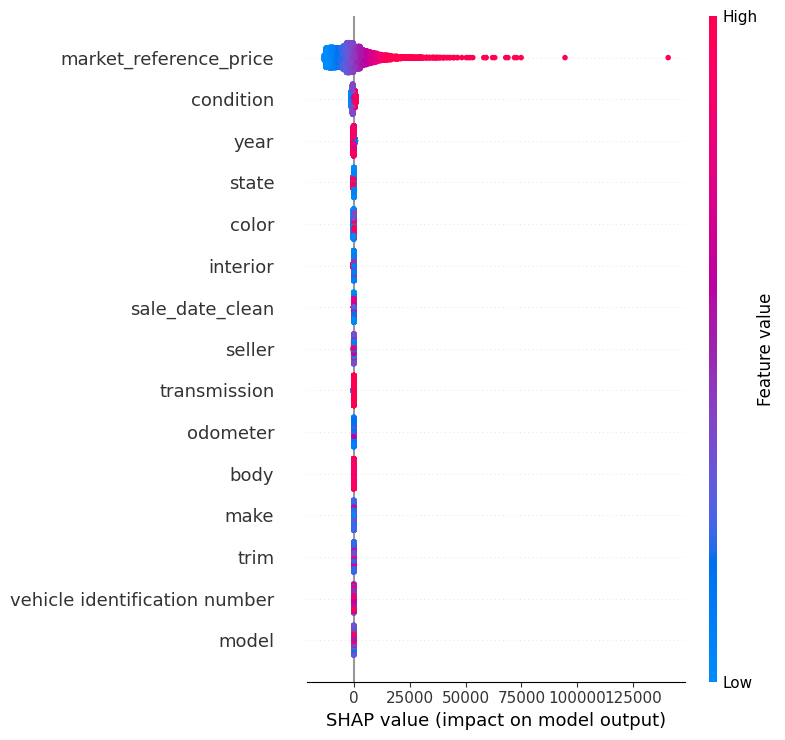

In [41]:
import shap
from sklearn.linear_model import Ridge

# Train the model with best parameters
ridge_model = Ridge(alpha=9.866613231759823)
ridge_model.fit(X_train, y_train)

# SHAP for Ridge Regression
ridge_explainer = shap.Explainer(ridge_model, X_train)
ridge_shap_values = ridge_explainer(X_test)

# Plot SHAP values
shap.summary_plot(ridge_shap_values, X_test)


3. SHAP for Decision Tree Regressor (Tree-based Model)



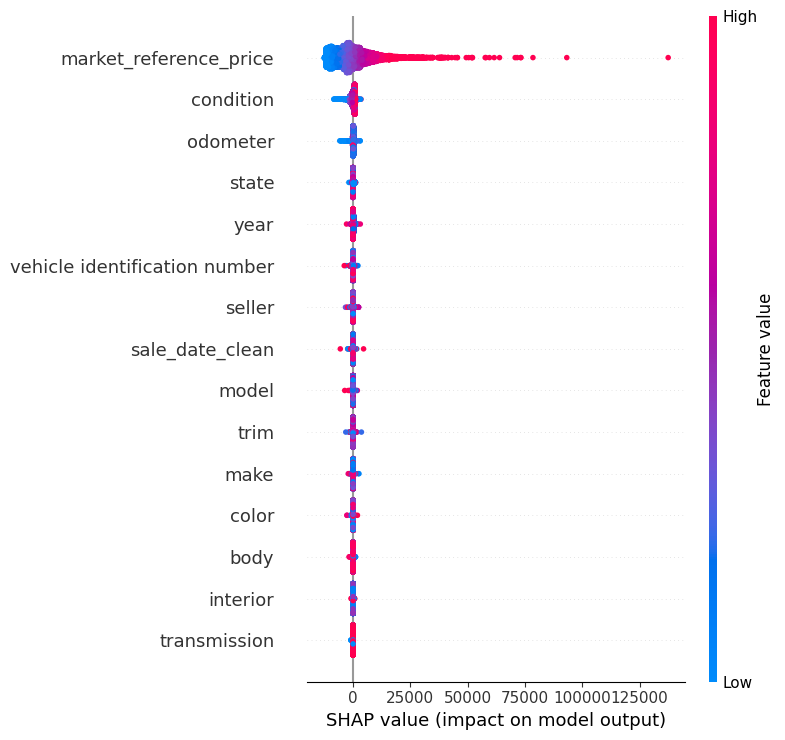

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree with best parameters
tree_model = DecisionTreeRegressor(max_depth=13, min_samples_split=4, min_samples_leaf=2)
tree_model.fit(X_train, y_train)

# SHAP for Decision Tree Regressor
tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(tree_shap_values, X_test)


5. SHAP for LightGBM Regressor (Tree-based Model)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 92887, number of used features: 15
[LightGBM] [Info] Start training from score 13223.778473


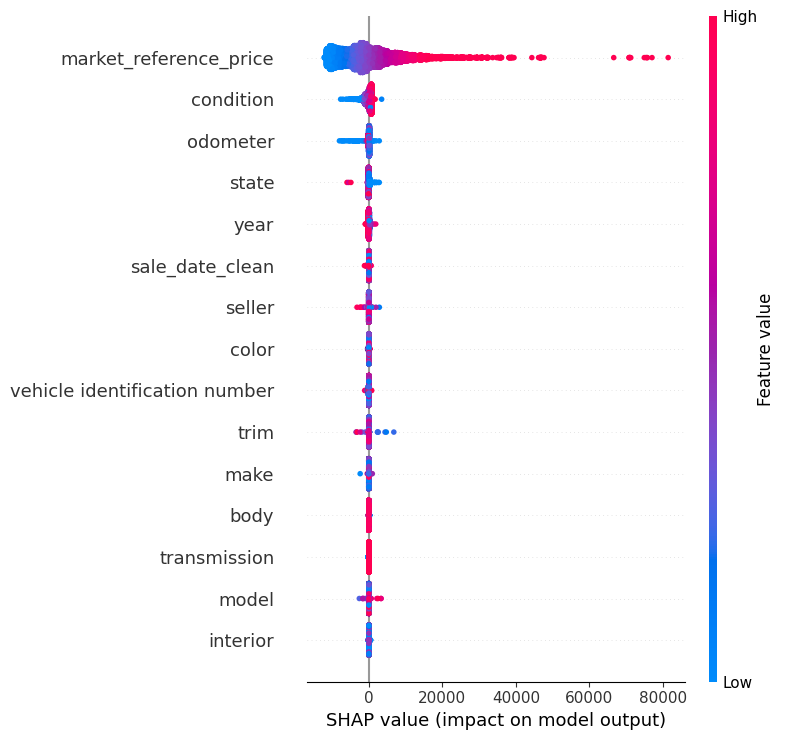

In [46]:
import lightgbm as lgb

# Train LightGBM model with best parameters
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05604154974075783, num_leaves=53)
lgb_model.fit(X_train, y_train)

# SHAP for LightGBM Regressor
lgb_explainer = shap.TreeExplainer(lgb_model)
lgb_shap_values = lgb_explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(lgb_shap_values, X_test)


**Conclusion:**

1. The Ensemble model emerges as the best model with the lowest error metrics and the highest R².

2. XGBoost and Random Forest also show strong performance, outperforming traditional models like Linear and Decision Tree Regression.

3. Models like Ridge and Lasso perform similarly to Linear Regression but with added regularization, offering minor improvements in certain cases.

4. CatBoost lags behind the others in terms of R², making it less suitable for this specific dataset.
